# UAS DATA MINING & WAREHOUSE
###### NAMA: ANANDA MYZZA MAHELIO
###### NIM: 2100702

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data csv, saya mengimport ke-6 dataset tersebut dikarenakan:
# df1 = Ketidakcukupan pangan dapat merepresentasikan umur panjang & hidup sehat serta standar hidup yang layak.
# df2 & df5 = Proporsi hidup dibawah 50% merepresentasikan standar hidup yang layak.
# df3 & df4 = Tidak buta huruf di atas 15 tahun & penduduk trampil TIK merepresentasikan Pengetahuan.
df1 = pd.read_csv("D:\\KULIAH\\SEMESTER 3\\Data Mining\\UAS\\Datasets\\ketidak_cukupan_pangan_prov.csv")
df2 = pd.read_csv("D:\\KULIAH\\SEMESTER 3\\Data Mining\\UAS\\Datasets\\proporsi_hidup_dibawah_50_persen_median_pendapatan.csv")
df3 = pd.read_csv("D:\\KULIAH\\SEMESTER 3\\Data Mining\\UAS\\Datasets\\melek_huruf_diatas15.csv")
df4 = pd.read_csv("D:\\KULIAH\\SEMESTER 3\\Data Mining\\UAS\\Datasets\\persen_penduduk_trampil_tik.csv")
df5 = pd.read_csv("D:\\KULIAH\\SEMESTER 3\\Data Mining\\UAS\\Datasets\\persen_rumah_dgn_fasilitas_cuci_tangan_sabun.csv")
df6 = pd.read_csv("D:\\KULIAH\\SEMESTER 3\\Data Mining\\UAS\\Datasets\\pmi.csv")

# PRAPROSES 

In [3]:
# Menggabungkan seluruh data yang ada dalam 1 dataframe.
dfM1 = pd.merge(df1, df2, on=['prov', 'tahun'])
dfM2 = pd.merge(df3, df4, on=['prov', 'tahun'])
dfM3 = pd.merge(df5, df6, on=['prov', 'tahun'])
dfM4 = pd.merge(dfM1, dfM2, on=['prov', 'tahun'])
df = pd.merge(dfM3, dfM4, on=['prov', 'tahun'])

In [4]:
# Cek hasil merge.
df.head()

,tahun,persen_rumah_dgn_fasilitas_cuci_tangan_sabun,prov,kategori_pmi,pct_tdk_cukup_pangan,proporsi_hidup_dibawah_50_persen_median_pendapatan,melek_huruf_diatas15,persen_penduduk_trampil_tik
0,2021,69.31,ACEH,TINGGI,6.90,9.98,98.24,60.21
1,2021,68.22,SUMATERA UTARA,TINGGI,6.33,5.87,99.19,67.41
2,2021,82.09,SUMATERA BARAT,TINGGI,6.02,2.47,99.26,68.00
3,2021,74.93,RIAU,TINGGI,10.61,2.52,99.2,70.69
4,2021,73.41,JAMBI,TINGGI,9.25,5.91,98.08,64.47


In [5]:
# Cek tipe data, apakah ada yang tidak sesuai.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   tahun                                               136 non-null    int64  
 1   persen_rumah_dgn_fasilitas_cuci_tangan_sabun        136 non-null    float64
 2   prov                                                136 non-null    object 
 3   kategori_pmi                                        136 non-null    object 
 4   pct_tdk_cukup_pangan                                136 non-null    float64
 5   proporsi_hidup_dibawah_50_persen_median_pendapatan  136 non-null    float64
 6   melek_huruf_diatas15                                136 non-null    object 
 7   persen_penduduk_trampil_tik                         136 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 9.6+ KB


In [6]:
# Mengganti tipe data yang tidak sesuai.
df["prov"] = df["prov"].astype("category")
df["melek_huruf_diatas15"] = df["melek_huruf_diatas15"].astype("float64")

In [7]:
# Mengecek hasil penggantian tipe data.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   tahun                                               136 non-null    int64   
 1   persen_rumah_dgn_fasilitas_cuci_tangan_sabun        136 non-null    float64 
 2   prov                                                136 non-null    category
 3   kategori_pmi                                        136 non-null    object  
 4   pct_tdk_cukup_pangan                                136 non-null    float64 
 5   proporsi_hidup_dibawah_50_persen_median_pendapatan  136 non-null    float64 
 6   melek_huruf_diatas15                                136 non-null    float64 
 7   persen_penduduk_trampil_tik                         136 non-null    float64 
dtypes: category(1), float64(5), int64(1), object(1)
memory usage: 9.9+ KB


In [8]:
# Mengecek banyaknya tahun dalam data, data tahun selain di bawah hilang karena hasil merge di line 4.
df.tahun.value_counts()

2021    34
2020    34
2019    34
2018    34
Name: tahun, dtype: int64

In [9]:
# Cek data yang NULL, dataframe tidak memiliki NULL karena hasil merge yang tidak memasukan tahun yang tidak ada dalam csv yang lain.
df.isna().sum()

tahun                                                 0
persen_rumah_dgn_fasilitas_cuci_tangan_sabun          0
prov                                                  0
kategori_pmi                                          0
pct_tdk_cukup_pangan                                  0
proporsi_hidup_dibawah_50_persen_median_pendapatan    0
melek_huruf_diatas15                                  0
persen_penduduk_trampil_tik                           0
dtype: int64

In [10]:
# Cek data kategori pmi
df.kategori_pmi.unique()

array(['TINGGI', 'SEDANG', 'SANGAT TINGGI'], dtype=object)

In [11]:
# Mengubah kategori pmi menjadi numerik
df["kategori_pmi"] = df["kategori_pmi"].replace({"TINGGI":"75","SEDANG":"65", "SANGAT RENDAH":"55", "SANGAT TINGGI":"85"})

In [12]:
# Mengubah tipe data menjadi integer
df["kategori_pmi"] = df["kategori_pmi"].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   tahun                                               136 non-null    int64   
 1   persen_rumah_dgn_fasilitas_cuci_tangan_sabun        136 non-null    float64 
 2   prov                                                136 non-null    category
 3   kategori_pmi                                        136 non-null    int64   
 4   pct_tdk_cukup_pangan                                136 non-null    float64 
 5   proporsi_hidup_dibawah_50_persen_median_pendapatan  136 non-null    float64 
 6   melek_huruf_diatas15                                136 non-null    float64 
 7   persen_penduduk_trampil_tik                         136 non-null    float64 
dtypes: category(1), float64(5), int64(2)
memory usage: 9.9 KB


# EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'ACEH'),
  Text(1, 0, 'BALI'),
  Text(2, 0, 'BANTEN'),
  Text(3, 0, 'BENGKULU'),
  Text(4, 0, 'DI YOGYAKARTA'),
  Text(5, 0, 'DKI JAKARTA'),
  Text(6, 0, 'GORONTALO'),
  Text(7, 0, 'JAMBI'),
  Text(8, 0, 'JAWA BARAT'),
  Text(9, 0, 'JAWA TENGAH'),
  Text(10, 0, 'JAWA TIMUR'),
  Text(11, 0, 'KALIMANTAN BARAT'),
  Text(12, 0, 'KALIMANTAN SELATAN'),
  Text(13, 0, 'KALIMANTAN TENGAH'),
  Text(14, 0, 'KALIMANTAN TIMUR'),
  Text(15, 0, 'KALIMANTAN UTARA'),
  Text(16, 0, 'KEP. BANGKA BELITUNG'),
  Text(17, 0, 'KEP. RIAU'),
  Text(18, 0, 'LAMPUNG'),
  Text(19, 0, 'MALUKU'),
  Text(20, 0, 'MALUKU UTARA'),
  Text(21, 0, 'NUSA TENGGARA BARAT'),
  Text(22, 0, 'NUSA TENGGARA TIMUR'),
  Text(23, 0, 'PAPUA'),
  Text(24, 0, 'PAPUA BARAT'),
  Text(25, 0, 'RIAU'),
  Text(26, 0, 'SULAWESI BARAT'),
  Text(27, 0, 'SULAWESI SELATAN'),
  Text(2

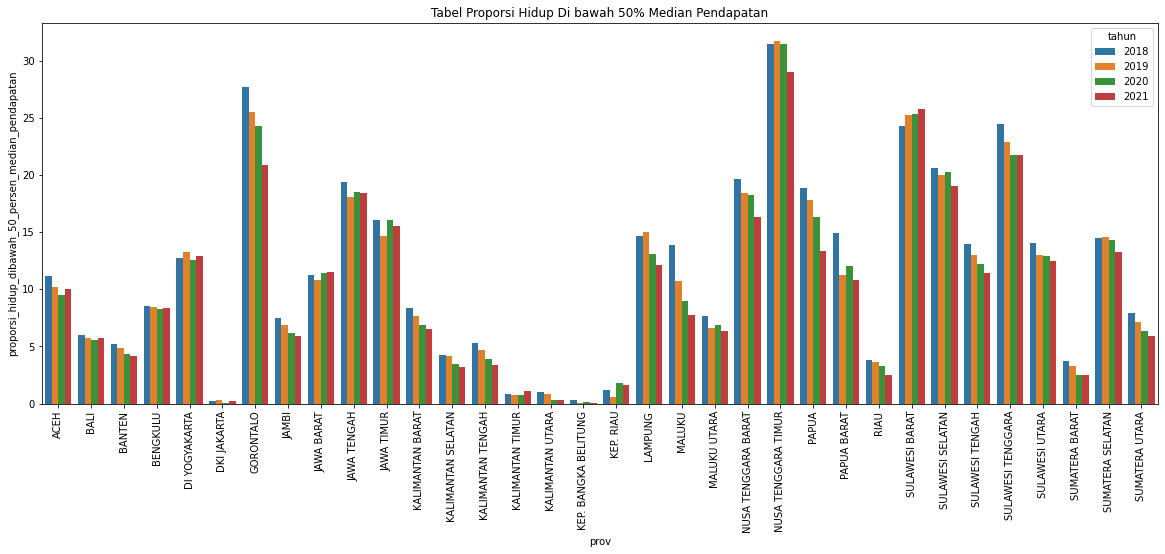

In [13]:
# Melihat apakah proporsi hidup di setiap provinsi naik atau tidak.
fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x="prov",y="proporsi_hidup_dibawah_50_persen_median_pendapatan", hue="tahun", data=df, ci=None).set(title="Tabel Proporsi Hidup Di bawah 50% Median Pendapatan")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'ACEH'),
  Text(1, 0, 'BALI'),
  Text(2, 0, 'BANTEN'),
  Text(3, 0, 'BENGKULU'),
  Text(4, 0, 'DI YOGYAKARTA'),
  Text(5, 0, 'DKI JAKARTA'),
  Text(6, 0, 'GORONTALO'),
  Text(7, 0, 'JAMBI'),
  Text(8, 0, 'JAWA BARAT'),
  Text(9, 0, 'JAWA TENGAH'),
  Text(10, 0, 'JAWA TIMUR'),
  Text(11, 0, 'KALIMANTAN BARAT'),
  Text(12, 0, 'KALIMANTAN SELATAN'),
  Text(13, 0, 'KALIMANTAN TENGAH'),
  Text(14, 0, 'KALIMANTAN TIMUR'),
  Text(15, 0, 'KALIMANTAN UTARA'),
  Text(16, 0, 'KEP. BANGKA BELITUNG'),
  Text(17, 0, 'KEP. RIAU'),
  Text(18, 0, 'LAMPUNG'),
  Text(19, 0, 'MALUKU'),
  Text(20, 0, 'MALUKU UTARA'),
  Text(21, 0, 'NUSA TENGGARA BARAT'),
  Text(22, 0, 'NUSA TENGGARA TIMUR'),
  Text(23, 0, 'PAPUA'),
  Text(24, 0, 'PAPUA BARAT'),
  Text(25, 0, 'RIAU'),
  Text(26, 0, 'SULAWESI BARAT'),
  Text(27, 0, 'SULAWESI SELATAN'),
  Text(2

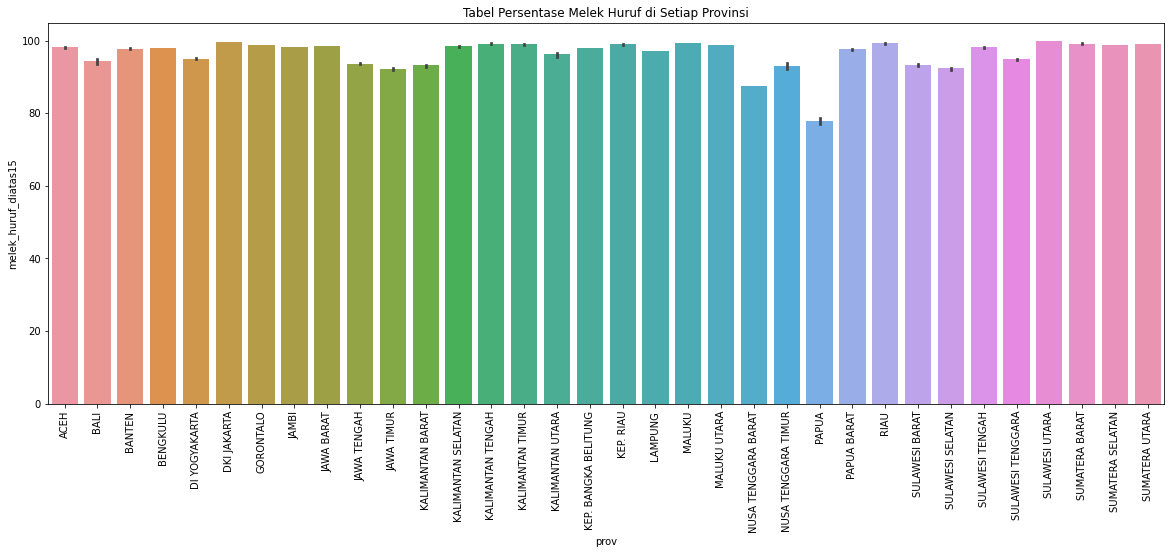

In [14]:
# Visualisasi tabel untuk melihat persentase melek huruf di setiap provinsi, dapat dilihat bahwa hampir semua provinsi berada di atas 90% kecuali papua
fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x="prov", y="melek_huruf_diatas15", data=df).set(title="Tabel Persentase Melek Huruf di Setiap Provinsi")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'ACEH'),
  Text(1, 0, 'BALI'),
  Text(2, 0, 'BANTEN'),
  Text(3, 0, 'BENGKULU'),
  Text(4, 0, 'DI YOGYAKARTA'),
  Text(5, 0, 'DKI JAKARTA'),
  Text(6, 0, 'GORONTALO'),
  Text(7, 0, 'JAMBI'),
  Text(8, 0, 'JAWA BARAT'),
  Text(9, 0, 'JAWA TENGAH'),
  Text(10, 0, 'JAWA TIMUR'),
  Text(11, 0, 'KALIMANTAN BARAT'),
  Text(12, 0, 'KALIMANTAN SELATAN'),
  Text(13, 0, 'KALIMANTAN TENGAH'),
  Text(14, 0, 'KALIMANTAN TIMUR'),
  Text(15, 0, 'KALIMANTAN UTARA'),
  Text(16, 0, 'KEP. BANGKA BELITUNG'),
  Text(17, 0, 'KEP. RIAU'),
  Text(18, 0, 'LAMPUNG'),
  Text(19, 0, 'MALUKU'),
  Text(20, 0, 'MALUKU UTARA'),
  Text(21, 0, 'NUSA TENGGARA BARAT'),
  Text(22, 0, 'NUSA TENGGARA TIMUR'),
  Text(23, 0, 'PAPUA'),
  Text(24, 0, 'PAPUA BARAT'),
  Text(25, 0, 'RIAU'),
  Text(26, 0, 'SULAWESI BARAT'),
  Text(27, 0, 'SULAWESI SELATAN'),
  Text(2

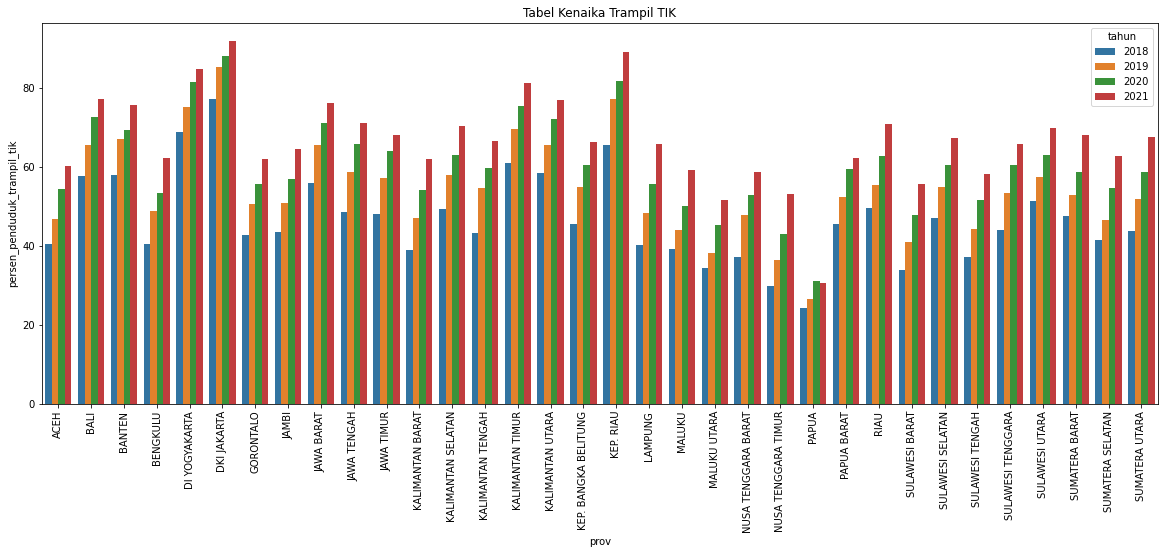

In [15]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x="prov", y="persen_penduduk_trampil_tik", hue="tahun", data=df).set(title='Tabel Kenaika Trampil TIK')
plt.xticks(rotation=90)

# MODELING

In [16]:
df_temp = df.copy()

In [17]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   tahun                                               136 non-null    int64   
 1   persen_rumah_dgn_fasilitas_cuci_tangan_sabun        136 non-null    float64 
 2   prov                                                136 non-null    category
 3   kategori_pmi                                        136 non-null    int64   
 4   pct_tdk_cukup_pangan                                136 non-null    float64 
 5   proporsi_hidup_dibawah_50_persen_median_pendapatan  136 non-null    float64 
 6   melek_huruf_diatas15                                136 non-null    float64 
 7   persen_penduduk_trampil_tik                         136 non-null    float64 
dtypes: category(1), float64(5), int64(2)
memory usage: 9.9 KB


In [18]:
df_temp = pd.get_dummies(data=df_temp, columns=['tahun', 'prov'])

In [19]:
#cek hasil
df_temp.head()

,persen_rumah_dgn_fasilitas_cuci_tangan_sabun,kategori_pmi,pct_tdk_cukup_pangan,proporsi_hidup_dibawah_50_persen_median_pendapatan,melek_huruf_diatas15,persen_penduduk_trampil_tik,tahun_2018,tahun_2019,tahun_2020,tahun_2021,...,prov_PAPUA BARAT,prov_RIAU,prov_SULAWESI BARAT,prov_SULAWESI SELATAN,prov_SULAWESI TENGAH,prov_SULAWESI TENGGARA,prov_SULAWESI UTARA,prov_SUMATERA BARAT,prov_SUMATERA SELATAN,prov_SUMATERA UTARA
0,69.31,75,6.90,9.98,98.24,60.21,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,68.22,75,6.33,5.87,99.19,67.41,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,82.09,75,6.02,2.47,99.26,68.00,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,74.93,75,10.61,2.52,99.20,70.69,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,73.41,75,9.25,5.91,98.08,64.47,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 44 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   persen_rumah_dgn_fasilitas_cuci_tangan_sabun        136 non-null    float64
 1   kategori_pmi                                        136 non-null    int64  
 2   pct_tdk_cukup_pangan                                136 non-null    float64
 3   proporsi_hidup_dibawah_50_persen_median_pendapatan  136 non-null    float64
 4   melek_huruf_diatas15                                136 non-null    float64
 5   persen_penduduk_trampil_tik                         136 non-null    float64
 6   tahun_2018                                          136 non-null    uint8  
 7   tahun_2019                                          136 non-null    uint8  
 8   tahun_2020                                          136 non-null    uint8  
 9  

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_temp["kategori_pmi"])
Y = le.transform(df_temp["kategori_pmi"]) 

In [22]:
#hapus data target pada dataset
X = df_temp.drop("kategori_pmi",axis=1)

In [23]:
import pickle
with open('C:\\Users\\anand\\kategori_pmi_x_train_columns.pickle', 'wb') as fp:
    pickle.dump(X, fp)

In [24]:
#split data antara data train dan data test (80% data train, 20% data test)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=100, random_state=123, max_depth=10)
clf1.fit(X_train, Y_train)
Y_pred = clf1.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.9285714285714286
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.89      1.00      0.94        17
           2       0.00      0.00      0.00         1

    accuracy                           0.93        28
   macro avg       0.63      0.63      0.63        28
weighted avg       0.90      0.93      0.91        28



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
import xgboost as xgb
clf2=xgb.XGBClassifier(max_depth=10, learning_rate=0.1, gamma=0.1, n_estimators=100, objective='binary:logistic', booster='dart', colsample_bytree=0.7, colsample_bylevel=0.8, colsample_bynode=0.8, normalize_type='forest', sample_type='weighted', tree_method='gpu_hist', sampling_method='gradient_based')
# num_class adalah jumlah kelas
clf2.fit(X_train, Y_train)
Y_pred = clf2.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.8571428571428571
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.81      1.00      0.89        17
           2       0.00      0.00      0.00         1

    accuracy                           0.86        28
   macro avg       0.60      0.57      0.57        28
weighted avg       0.85      0.86      0.84        28



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#cek matrix confusionnya
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[ 7  3  0]
 [ 0 17  0]
 [ 0  1  0]]


In [29]:
feature_importances = pd.DataFrame(clf1.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
pct_tdk_cukup_pangan,0.224282
persen_penduduk_trampil_tik,0.141449
proporsi_hidup_dibawah_50_persen_median_pendapatan,0.139298
melek_huruf_diatas15,0.089585
persen_rumah_dgn_fasilitas_cuci_tangan_sabun,0.065280
prov_DKI JAKARTA,0.046511
prov_LAMPUNG,0.033155
prov_NUSA TENGGARA BARAT,0.026888
prov_GORONTALO,0.022963
prov_KALIMANTAN BARAT,0.020350
